# Correlation Data Analysis

## Student Id: **24136959**

## Overview
This notebook performs comprehensive correlation analysis on retail customer data to identify relationships between variables and uncover patterns in customer behavior and transactions.

## Intent
The primary intent of this analysis is to:
1. **Identify Feature Relationships**: Discover correlations between numeric variables (transaction amounts, purchase frequency, customer tenure, etc.) to understand which factors move together
2. **Segment-Specific Insights**: Perform correlation analysis broken down by customer segments to reveal segment-specific patterns and behaviors
3. **Categorical Dependencies**: Explore cross-tabulation relationships between categorical variables (Gender, Country, Product Category, Payment Method) and customer segments
4. **Feature Engineering Guidance**: Provide actionable insights to inform feature selection and engineering decisions for predictive modeling
5. **Data Quality Validation**: Assess data consistency through correlation patterns and identify potential data issues or outliers
6. **Visualization Communication**: Present findings through heatmaps and cross-tabs for clear stakeholder communication

## Key Libraries Used
- **pandas**: Data manipulation, aggregation, and correlation computations
- **numpy**: Numerical operations and array handling
- **matplotlib**: Core plotting and figure management
- **seaborn**: Statistical visualization and heatmap generation
- **scikit-learn**: 
  - `StandardScaler`: Normalization of numeric features
  - `OneHotEncoder`: Encoding categorical variables
  - `ColumnTransformer`: Preprocessing pipeline for mixed data types
  - `Pipeline`: Chaining preprocessing steps

## Output
Correlation matrices, heatmaps, and cross-tabulation insights to guide feature selection and understand multivariate relationships in the dataset.

## Setup and Import Libraries

In [22]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# Load the dataset
data_path = '../data/raw/data.csv'  # retail customer data 20000 4539.csv renamed to data.csv
df = pd.read_csv(data_path)
# Quick peek
df.head()

,Customer_ID,Name,Email,Gender,Age,City,Country,Date_of_Purchase,Product_Category,Purchase_Amount,Payment_Method,Loyalty_Member,Satisfaction_Score
0,0e1e5ebd-ff99-4e31-9006-e0eb63a84422,Richard Bryant,heatherweber@gmail.com,Female,54,West Jasmineport,Zimbabwe,24/09/2023,Beauty,807.85,Credit Card,Yes,2
1,c3649c91-faca-40d4-956e-09491de58d73,Jeffrey Stevens,charleschristian@smith.org,Other,52,Cheyennestad,Gabon,05/07/2023,Sports,433.16,Bank Transfer,Yes,5
2,1336eb28-33ba-4e1b-80ff-8beb631eb726,Robert Sanchez,karenwalsh@gmail.com,Male,40,Williamsonfort,Cook Islands,28/04/2024,Electronics,122.26,Credit Card,No,5
3,d076ddad-317e-43a4-ab16-b1fd14ca728c,Taylor Mullins,lisa34@cruz.info,Male,23,Mariaport,Bhutan,28/09/2023,Electronics,439.39,PayPal,Yes,4
4,f830aa05-d2d4-4d05-95b8-23649ca4d06c,Andrew Owens,lynn63@hotmail.com,Other,21,North Pamelaton,Svalbard & Jan Mayen Islands,20/07/2023,Books,462.73,Credit Card,No,3


Basic EDA using Sciklearn

## Clean and prepare data types for correlation

In [23]:
# Convert date column
df['Date_of_Purchase'] = pd.to_datetime(df['Date_of_Purchase'], format='%d/%m/%Y')

# Explicit categorical types (optional but useful)
cat_cols = ['Gender', 'Country', 'City', 'Product_Category',
            'Payment_Method', 'Loyalty_Member']
for c in cat_cols:
    df[c] = df[c].astype('category')

df[['Date_of_Purchase'] + cat_cols].head()


,Date_of_Purchase,Gender,Country,City,Product_Category,Payment_Method,Loyalty_Member
0,2023-09-24,Female,Zimbabwe,West Jasmineport,Beauty,Credit Card,Yes
1,2023-07-05,Other,Gabon,Cheyennestad,Sports,Bank Transfer,Yes
2,2024-04-28,Male,Cook Islands,Williamsonfort,Electronics,Credit Card,No
3,2023-09-28,Male,Bhutan,Mariaport,Electronics,PayPal,Yes
4,2023-07-20,Other,Svalbard & Jan Mayen Islands,North Pamelaton,Books,Credit Card,No


## Now, show correlation analysis on numerical attributes

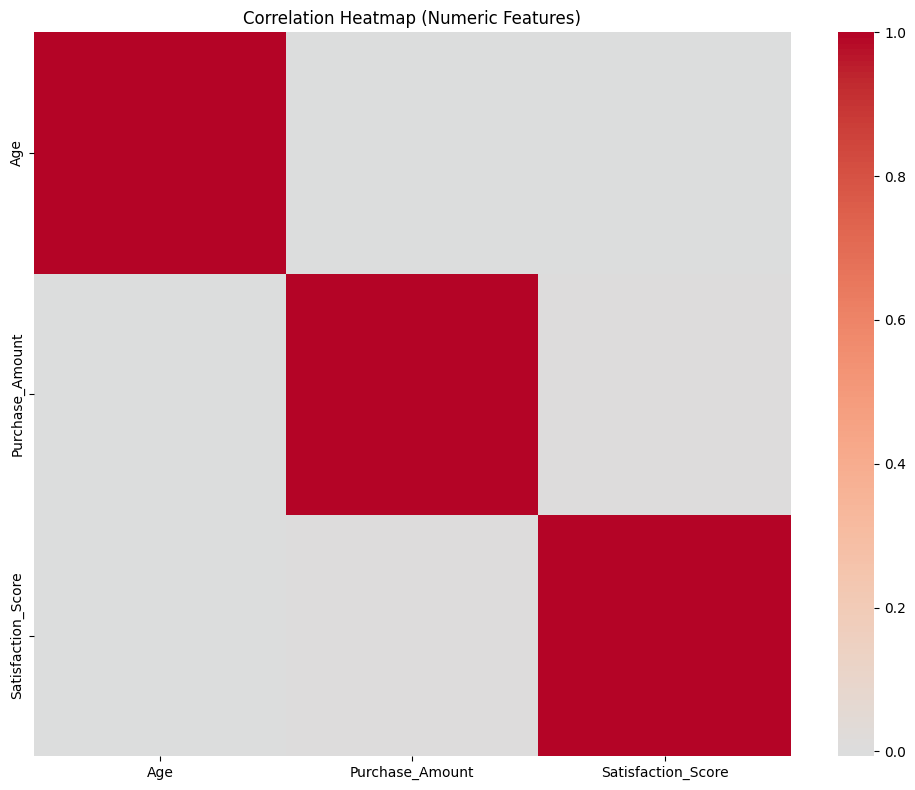

In [24]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Correlation matrix for numeric columns (to spot suspicious relationships)
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap (Numeric Features)')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

Crosstab analysis: Gender × Product Category

In [25]:
ct_gender_product = pd.crosstab(df['Gender'], df['Product_Category'])
ct_gender_product





Product_Category,Beauty,Books,Clothing,Electronics,Home,Sports
Gender,,,,,,
Female,1072,1077,1106,1110,1088,1147
Male,1153,1120,1116,1130,1063,1102
Other,1076,1136,1128,1127,1113,1136


With percentages

In [26]:
ct_gender_product_pct = pd.crosstab(
    df['Gender'], df['Product_Category'],
    normalize='index'
).round(3)

ct_gender_product_pct

Product_Category,Beauty,Books,Clothing,Electronics,Home,Sports
Gender,,,,,,
Female,0.16,0.16,0.17,0.17,0.17,0.17
Male,0.17,0.17,0.17,0.17,0.16,0.17
Other,0.16,0.17,0.17,0.17,0.17,0.17


Crosstab: Country × Product Category (top N countries)

In [27]:
top_countries = df['Country'].value_counts().head(15).index

ct_country_product = pd.crosstab(
    df.loc[df['Country'].isin(top_countries), 'Country'],
    df['Product_Category']
)

ct_country_product


Product_Category,Beauty,Books,Clothing,Electronics,Home,Sports
Country,,,,,,
Albania,10,9,21,22,18,19
Argentina,24,15,24,16,18,17
Congo,28,41,22,32,33,29
Czech Republic,12,15,13,20,16,21
Estonia,14,15,23,12,15,18
French Polynesia,11,7,21,15,26,18
Greenland,16,14,21,12,16,23
Haiti,22,11,14,17,18,16
Holy See (Vatican City State),18,10,16,14,19,21


## Conclusion

In this notebook, we have performed initial exploratory data analysis on the dataset. We have loaded the data, inspected its structure, and visualized key features. Further analysis and preprocessing will be conducted in the next notebook.